### Data Drift: Detection Using Statistical Tests
**Question**: Simulate two datasets with a shift in distribution, and apply the Kolmogorov-
Smirnov test to determine if data drift has occurred.

In [1]:
# write your code from here
!pip install scipy numpy matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


/tmp/ipykernel_1828/356053931.py:20: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


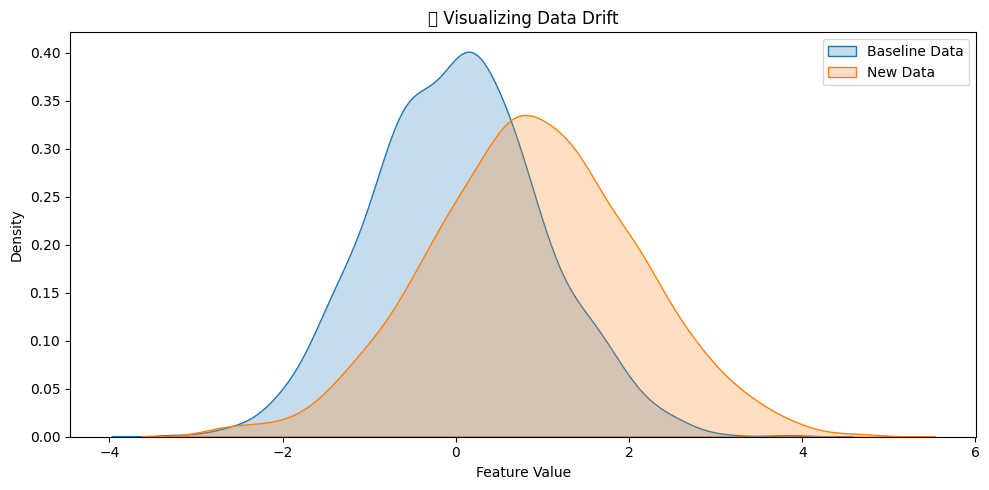


🧪 Kolmogorov-Smirnov Test Results:
KS Statistic: 0.3370
P-value: 1.0618e-50
❗ Significant difference detected — data drift likely.


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Step 1: Simulate baseline (training) data
np.random.seed(42)
baseline = np.random.normal(loc=0, scale=1, size=1000)  # mean = 0, std = 1

# Step 2: Simulate new data (inference time) with shifted distribution
new_data = np.random.normal(loc=0.8, scale=1.2, size=1000)  # drifted mean & std

# Step 3: Visualize the distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(baseline, label="Baseline Data", fill=True)
sns.kdeplot(new_data, label="New Data", fill=True)
plt.title("📉 Visualizing Data Drift")
plt.xlabel("Feature Value")
plt.legend()
plt.tight_layout()
plt.show()

# Step 4: Apply Kolmogorov-Smirnov test
ks_stat, p_value = ks_2samp(baseline, new_data)

print(f"\n🧪 Kolmogorov-Smirnov Test Results:")
print(f"KS Statistic: {ks_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# Step 5: Interpret result
alpha = 0.05
if p_value < alpha:
    print("❗ Significant difference detected — data drift likely.")
else:
    print("✅ No significant difference — data is likely stable.")
